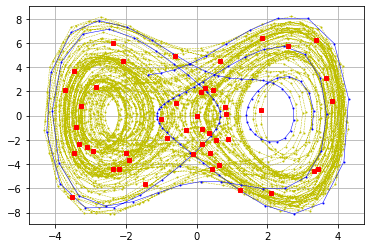

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
def RK2(f,u,times,subdiv = 1):
     uout = np.zeros((len(times),)+u.shape)
     uout[0] = u;
     for k in range(len(times)-1):
         t = times[k]
         h = (times[k+1]-times[k])/subdiv
         for j in range(subdiv):
            k1 = f(u,t)*h
            k2 = f(u+0.5*k1, t+0.5*h)*h
            u, t = u+k2, t+h
         uout[k+1]=u
     return uout

def plotphase(A,B,C,D,E):
     def derivs(u,t): y,z = u; return np.array([ z, -A*y**3 + B*y - C*z + D*np.cos(E*t) ])
     N=60
     u0 = np.array([0.0, 0.0])
     t  = np.arange(0,300,2*np.pi/N); 
     u  = RK2(derivs, u0, t, subdiv = 10)
     plt.plot(u[:-2*N,0],u[:-2*N,1],'.--y', u[-2*N:,0],u[-2*N:,1], '.-b', lw=0.5, ms=2);
     plt.plot(u[::N,0],u[::N,1],'rs', ms=4); plt.grid(); plt.show()
     return u

l = plotphase(1.0, 5.0, 0.02, 8.0, 0.5)

In [ ]:
l.shape

(2865, 2)

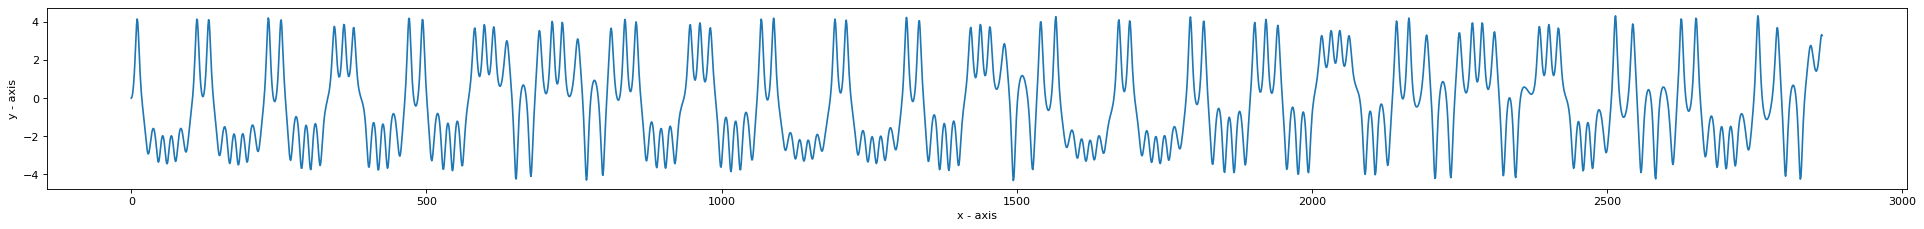

In [ ]:
# importing the required module 
import matplotlib.pyplot as plt 
  
a=range(0,2865)
from matplotlib.pyplot import figure
figure(num=None, figsize=(30, 3), dpi=80, facecolor='w', edgecolor='k')  
# plotting the points  
plt.plot(a, l[:,0]) 
  
# naming the x axis 
plt.xlabel('x - axis') 
# naming the y axis 
plt.ylabel('y - axis') 
   
  
# function to show the plot 
plt.show() 

In [ ]:
test_data_size = 410
all_data=l[:,0]
train_data = all_data[:-test_data_size]
test_data = all_data[-test_data_size:]

In [ ]:
print(len(train_data))
print(len(test_data))

2455
410


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
train_data_normalized = scaler.fit_transform(train_data .reshape(-1, 1))

In [ ]:
print(train_data_normalized[:5])
print(train_data_normalized[-5:])

[[0.00635011]
 [0.0166089 ]
 [0.04789157]
 [0.10176713]
 [0.18080585]]
[[-0.30156504]
 [-0.2794508 ]
 [-0.28653226]
 [-0.32321946]
 [-0.38960938]]


In [ ]:
train_data_normalized = torch.FloatTensor(train_data_normalized).view(-1)


In [ ]:
train_window = 120

In [ ]:
def create_inout_sequences(input_data, tw):
    inout_seq = []
    L = len(input_data)
    for i in range(L-tw):
        train_seq = input_data[i:i+tw]
        train_label = input_data[i+tw:i+tw+1]
        inout_seq.append((train_seq ,train_label))
    return inout_seq

In [ ]:
train_inout_seq = create_inout_sequences(train_data_normalized, train_window)

In [ ]:
train_inout_seq[:5]

[(tensor([ 0.0064,  0.0166,  0.0479,  0.1018,  0.1808,  0.2881,  0.4253,  0.5888,
           0.7612,  0.9052,  0.9715,  0.9312,  0.8018,  0.6305,  0.4587,  0.3072,
           0.1808,  0.0768, -0.0105, -0.0863, -0.1558, -0.2228, -0.2905, -0.3606,
          -0.4331, -0.5059, -0.5740, -0.6300, -0.6657, -0.6753, -0.6577, -0.6178,
          -0.5642, -0.5066, -0.4529, -0.4091, -0.3788, -0.3644, -0.3674, -0.3885,
          -0.4280, -0.4847, -0.5551, -0.6320, -0.7039, -0.7560, -0.7755, -0.7575,
          -0.7081, -0.6410, -0.5716, -0.5124, -0.4715, -0.4533, -0.4596, -0.4903,
          -0.5429, -0.6117, -0.6863, -0.7518, -0.7916, -0.7939, -0.7581, -0.6949,
          -0.6207, -0.5509, -0.4962, -0.4627, -0.4531, -0.4675, -0.5045, -0.5599,
          -0.6263, -0.6925, -0.7438, -0.7667, -0.7540, -0.7088, -0.6420, -0.5678,
          -0.4978, -0.4395, -0.3971, -0.3717, -0.3635, -0.3716, -0.3948, -0.4310,
          -0.4774, -0.5292, -0.5802, -0.6226, -0.6482, -0.6513, -0.6302, -0.5880,
          -0.530

In [ ]:
class LSTM(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=100, output_size=1):
        super().__init__()
        self.hidden_layer_size = hidden_layer_size

        self.lstm = nn.LSTM(input_size, hidden_layer_size)

        self.linear = nn.Linear(hidden_layer_size, output_size)

        self.hidden_cell = (torch.zeros(1,1,self.hidden_layer_size),
                            torch.zeros(1,1,self.hidden_layer_size))

    def forward(self, input_seq):
        lstm_out, self.hidden_cell = self.lstm(input_seq.view(len(input_seq) ,1, -1), self.hidden_cell)
        predictions = self.linear(lstm_out.view(len(input_seq), -1))
        return predictions[-1]

In [ ]:
model = LSTM()
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
print(model)

LSTM(
  (lstm): LSTM(1, 100)
  (linear): Linear(in_features=100, out_features=1, bias=True)
)


In [ ]:
epochs = 150

for i in range(epochs):
    for seq, labels in train_inout_seq:
        optimizer.zero_grad()
        model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size),
                        torch.zeros(1, 1, model.hidden_layer_size))

        y_pred = model(seq)

        single_loss = loss_function(y_pred, labels)
        single_loss.backward()
        optimizer.step()

    if i%25 == 1:
        print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')

print(f'epoch: {i:3} loss: {single_loss.item():10.10f}')

epoch:   1 loss: 0.00005488
epoch:  26 loss: 0.00000677
epoch:  51 loss: 0.00000651
epoch:  76 loss: 0.00001134
epoch: 101 loss: 0.00000431
epoch: 126 loss: 0.00002884
epoch: 149 loss: 0.0000005177


In [ ]:
fut_pred = 120

test_inputs = train_data_normalized[-train_window:].tolist()
print(test_inputs)

[0.008089342154562473, -0.012393267825245857, -0.05392218008637428, -0.11887094378471375, -0.21047353744506836, -0.3319115936756134, -0.4835650324821472, -0.6569337844848633, -0.8257814645767212, -0.9434841275215149, -0.9634705781936646, -0.8765804767608643, -0.7197662591934204, -0.5432143807411194, -0.38055670261383057, -0.24500076472759247, -0.13764242827892303, -0.0548703595995903, 0.007851507514715195, 0.054586101323366165, 0.08860623091459274, 0.11246182024478912, 0.12813985347747803, 0.1372150331735611, 0.14096523821353912, 0.14045250415802002, 0.13657788932323456, 0.1301189810037613, 0.12175732105970383, 0.11210080236196518, 0.10170432925224304, 0.09109068661928177, 0.08077282458543777, 0.07127813994884491, 0.06317538022994995, 0.05710478872060776, 0.053812384605407715, 0.054189518094062805, 0.05931905657052994, 0.07052931189537048, 0.08945481479167938, 0.11809704452753067, 0.1588616669178009, 0.2145107537508011, 0.28788623213768005, 0.3811148703098297, 0.493823766708374, 0.6199

In [ ]:
model.eval()

for i in range(fut_pred):
    seq = torch.FloatTensor(test_inputs[-train_window:])
    with torch.no_grad():
        model.hidden = (torch.zeros(1, 1, model.hidden_layer_size),
                        torch.zeros(1, 1, model.hidden_layer_size))
        test_inputs.append(model(seq).item())

In [ ]:
test_inputs[fut_pred:]

[-0.4847904443740845,
 -0.6037918329238892,
 -0.7312854528427124,
 -0.8366652131080627,
 -0.883093535900116,
 -0.851207435131073,
 -0.7557080388069153,
 -0.6330962777137756,
 -0.5156781673431396,
 -0.41957351565361023,
 -0.3475974500179291,
 -0.29625117778778076,
 -0.26072701811790466,
 -0.23701073229312897,
 -0.22233322262763977,
 -0.21504244208335876,
 -0.21440911293029785,
 -0.22053104639053345,
 -0.23433062434196472,
 -0.25755545496940613,
 -0.2926729917526245,
 -0.34251710772514343,
 -0.40940627455711365,
 -0.49326905608177185,
 -0.5885171294212341,
 -0.6808968782424927,
 -0.7482234239578247,
 -0.7686700820922852,
 -0.7332603931427002,
 -0.6519781947135925,
 -0.5466902852058411,
 -0.43768802285194397,
 -0.33548375964164734,
 -0.2405739426612854,
 -0.14674052596092224,
 -0.04358340799808502,
 0.08302031457424164,
 0.25155213475227356,
 0.4834313690662384,
 0.7925655245780945,
 1.1576480865478516,
 1.4844143390655518,
 1.627153754234314,
 1.5247594118118286,
 1.2508000135421753,
 0.

In [ ]:
actual_predictions = scaler.inverse_transform(np.array(test_inputs[train_window:] ).reshape(-1, 1))
print(actual_predictions)

[[-2.10736306]
 [-2.61796869]
 [-3.16501239]
 [-3.61717096]
 [-3.81638345]
 [-3.67956805]
 [-3.26980368]
 [-2.74370684]
 [-2.23989467]
 [-1.82753329]
 [-1.51870174]
 [-1.29838754]
 [-1.14596212]
 [-1.04420139]
 [-0.98122381]
 [-0.94994087]
 [-0.94722341]
 [-0.97349112]
 [-1.0327017 ]
 [-1.13235373]
 [-1.28303442]
 [-1.49690324]
 [-1.78390817]
 [-2.14374269]
 [-2.5524287 ]
 [-2.94880743]
 [-3.23768905]
 [-3.32542062]
 [-3.17348637]
 [-2.82472449]
 [-2.37296002]
 [-1.90525818]
 [-1.46672488]
 [-1.05949025]
 [-0.65687418]
 [-0.21425241]
 [ 0.32897295]
 [ 1.05210146]
 [ 2.0470381 ]
 [ 3.37345656]
 [ 4.93993585]
 [ 6.3420093 ]
 [ 6.95446895]
 [ 6.51512007]
 [ 5.33962781]
 [ 3.92536333]
 [ 2.60588524]
 [ 1.48326331]
 [ 0.50564943]
 [-0.45507524]
 [-1.55344202]
 [-2.88192246]
 [-4.27100259]
 [-5.18106361]
 [-5.10574455]
 [-4.1847114 ]
 [-3.05382609]
 [-2.09970453]
 [-1.39703357]
 [-0.89476971]
 [-0.5158427 ]
 [-0.19983713]
 [ 0.09657397]
 [ 0.40986797]
 [ 0.77757458]
 [ 1.24222885]
 [ 1.84874

In [ ]:
x = np.arange(132, 252, 1)
print(x)

[132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149
 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167
 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185
 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203
 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221
 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239
 240 241 242 243 244 245 246 247 248 249 250 251]


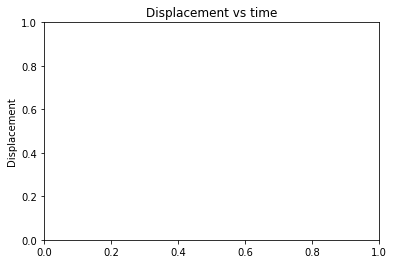

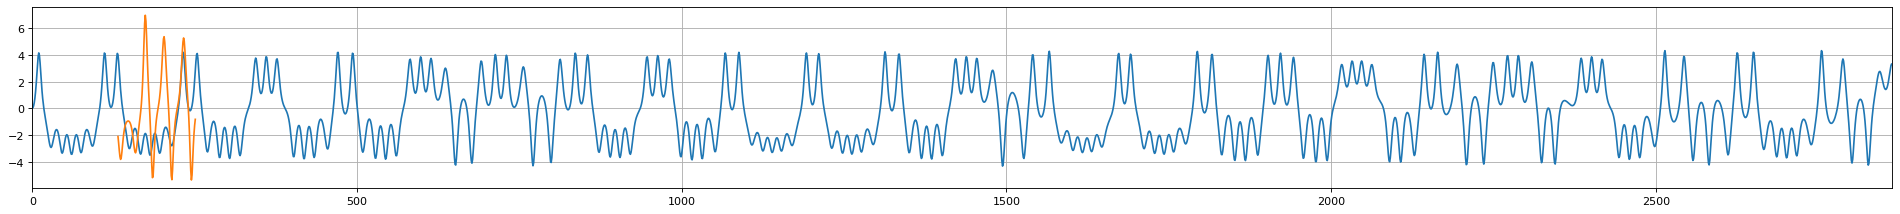

In [ ]:
plt.title('Displacement vs time')
plt.ylabel('Displacement') 
plt.grid(True)
plt.autoscale(axis='x', tight=True)
plt.plot(all_data)
plt.plot(x,actual_predictions)
plt.show()